In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from replay_analysis import ExperienceRelay
from replay_analysis import filter_frames
from replay_analysis import get_debug_values
from replay_analysis import analysis_case
from replay_analysis import PerspectiveRender
from replay_analysis import GradientAnalysis
from replay_analysis import highlight_position
from replay_analysis import pitch_roll_deviation

from experiment_path import experiment
from rover_spec import GROUND_TRUTH_MAP

In [2]:
gradient_analyzer = GradientAnalysis(GROUND_TRUTH_MAP)
path = experiment('perception_optimize/cv2_perspective')
replay = ExperienceRelay(path=path)
render = PerspectiveRender(scale=1, resolution=60)
replay.replay()

In [3]:
frames = replay.frames
analysis = [(gradient_analyzer.analysis(x.debug['map_gradients'], render=True), x)
            for x in frames]
bad_cases = [(m, x) for m, x in analysis if m.ratio < 0.6]
good_cases = [(m, x) for m, x in analysis if m.ratio > 0.8]
print('case num, good =', len(good_cases), ', bad =', len(bad_cases))
pitch_roll = pitch_roll_deviation([x[1] for x in good_cases])
print('good case mean pitch and roll diviation: ', pitch_roll)
pitch_roll = pitch_roll_deviation([x[1] for x in bad_cases])
print('good case mean pitch and roll diviation: ', pitch_roll)

case num, good = 1884 , bad = 2234
good case mean pitch and roll diviation:  (0.66595501988059325, 0.42977227691451009)
good case mean pitch and roll diviation:  (1.0538091182394396, 0.43530970806134206)


overall performance of CV2Perspective:


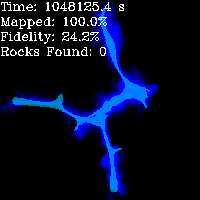

In [9]:
print('overall performance of CV2Perspective:')
frames[-1].map

roll and pitch deviation: 0.00068095891038 1.22028899193
yaw = 96.3266 , pitch =  1.22029 , roll =  0.000680959
rover position: 114.625 8.68969
map gradient: fidelity = 0.5978260869565217 pos = 110 neg = 74


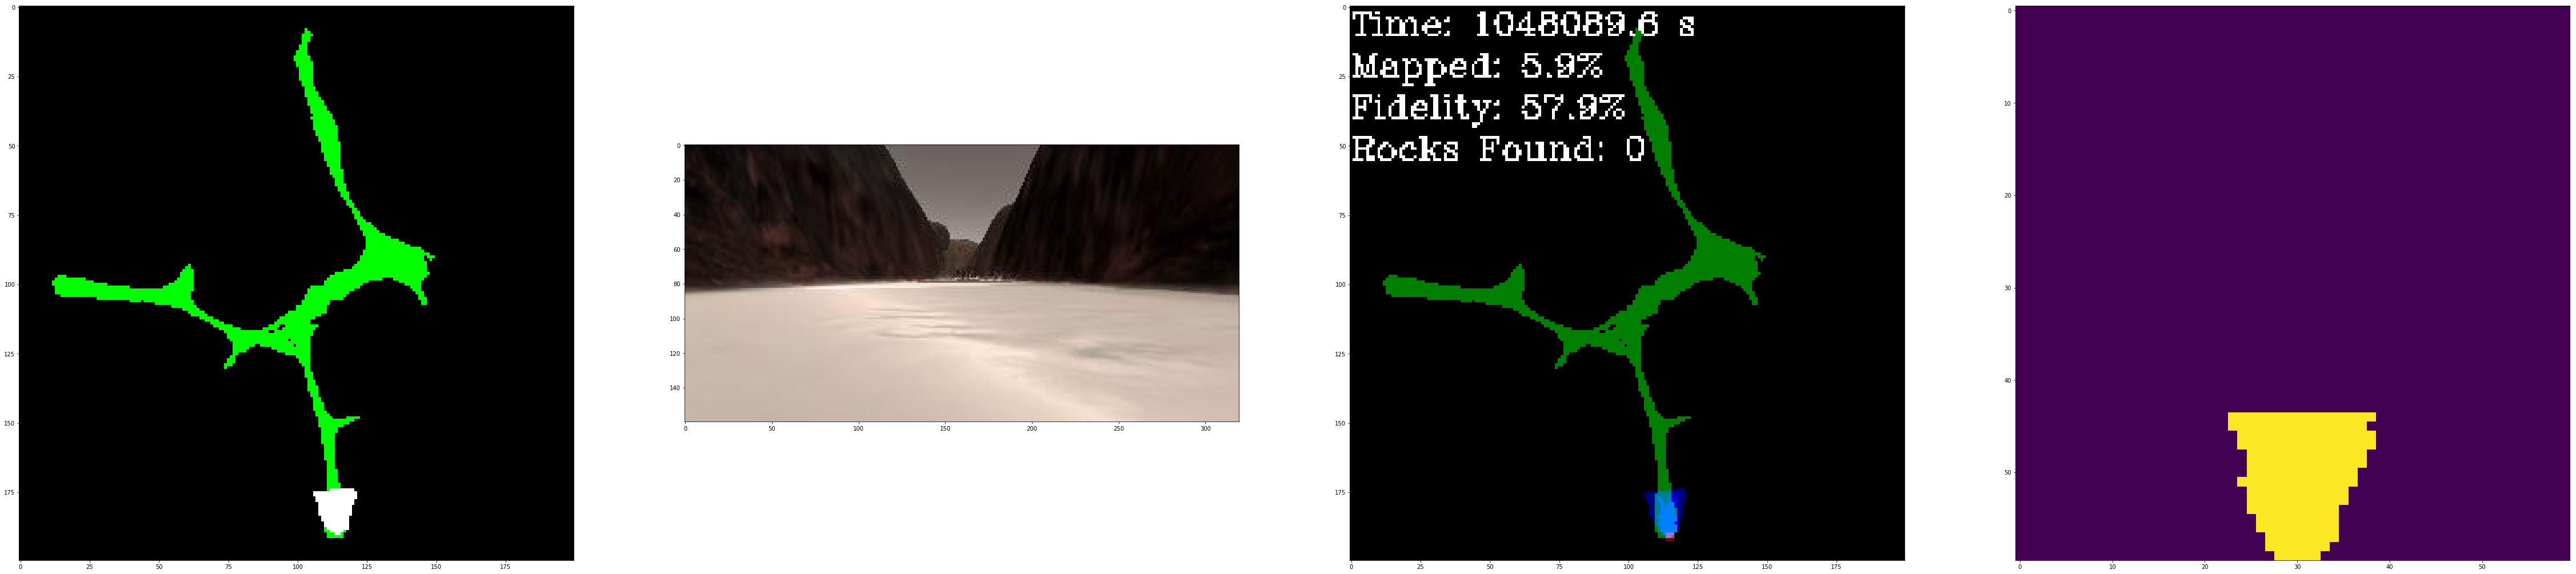

In [4]:
case = bad_cases[0]
analysis_case(case[1], case[0], render)

roll and pitch deviation: 0.470585405827 1.06186401844
yaw = 104.778 , pitch =  1.06186 , roll =  0.470585
rover position: 108.306 57.3617
map gradient: fidelity = 0.4888888888888889 pos = 44 neg = 46


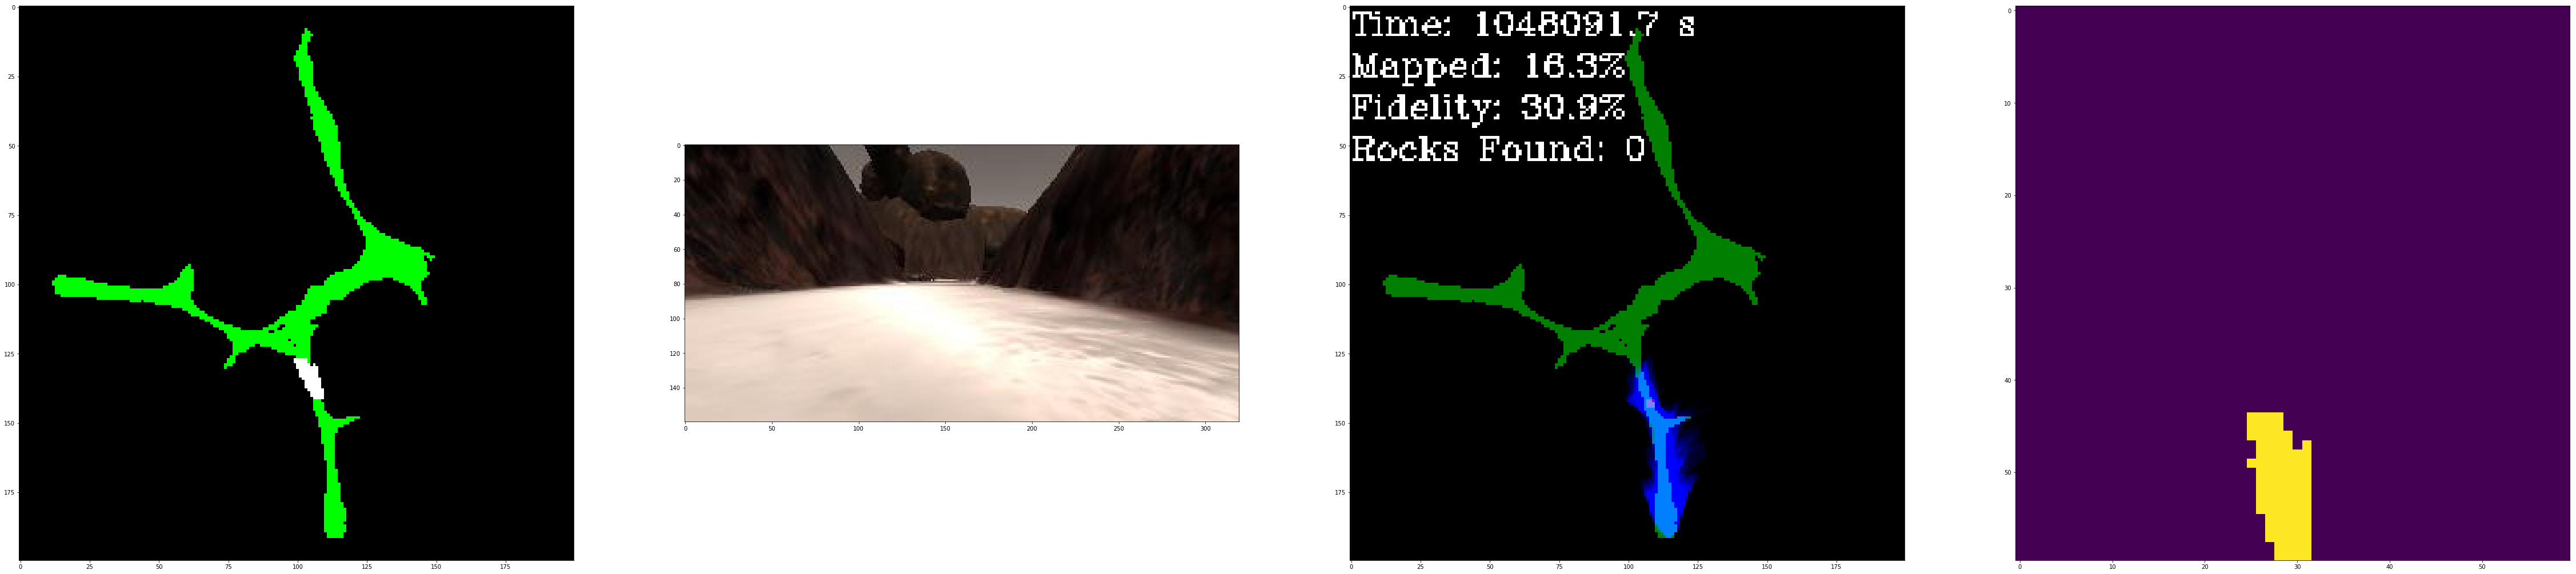

In [5]:
case = bad_cases[200]
analysis_case(case[1], case[0], render)

roll and pitch deviation: 0.0012662060326 1.49977004528
yaw = 138.116 , pitch =  1.49977 , roll =  0.00126621
rover position: 133.723 111.136
map gradient: fidelity = 0.3173076923076923 pos = 99 neg = 213


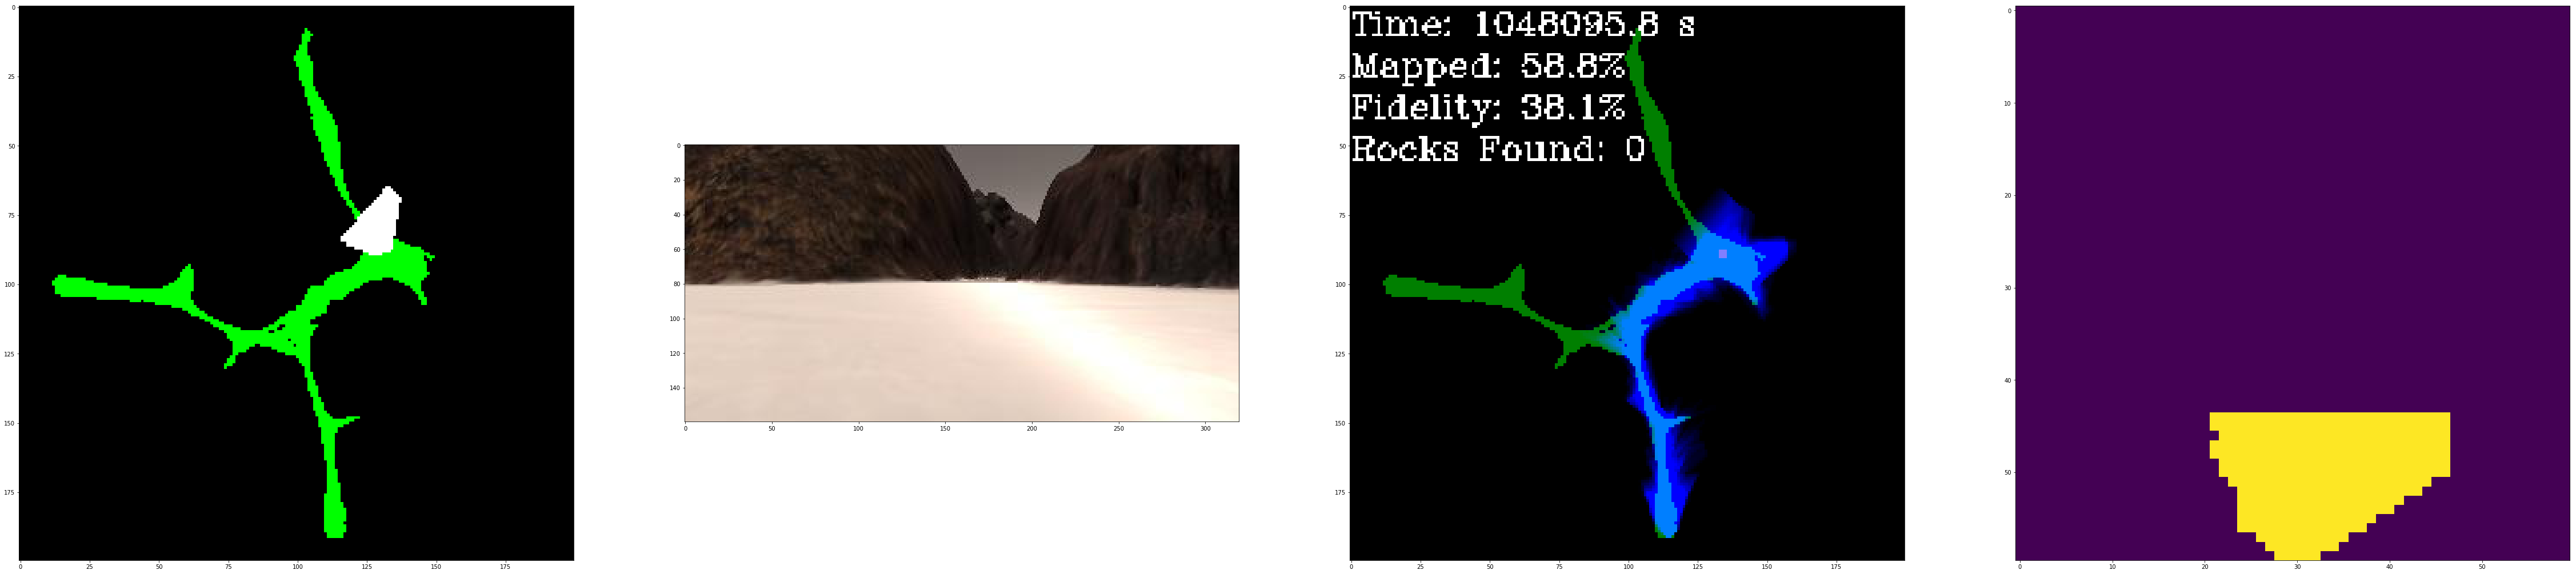

In [6]:
case = bad_cases[400]
analysis_case(case[1], case[0], render)

roll and pitch deviation: 0.64074909687 5.24204587936
yaw = 175.542 , pitch =  5.24205 , roll =  0.640749
rover position: 107.906 167.964
map gradient: fidelity = 0.1856763925729443 pos = 70 neg = 307


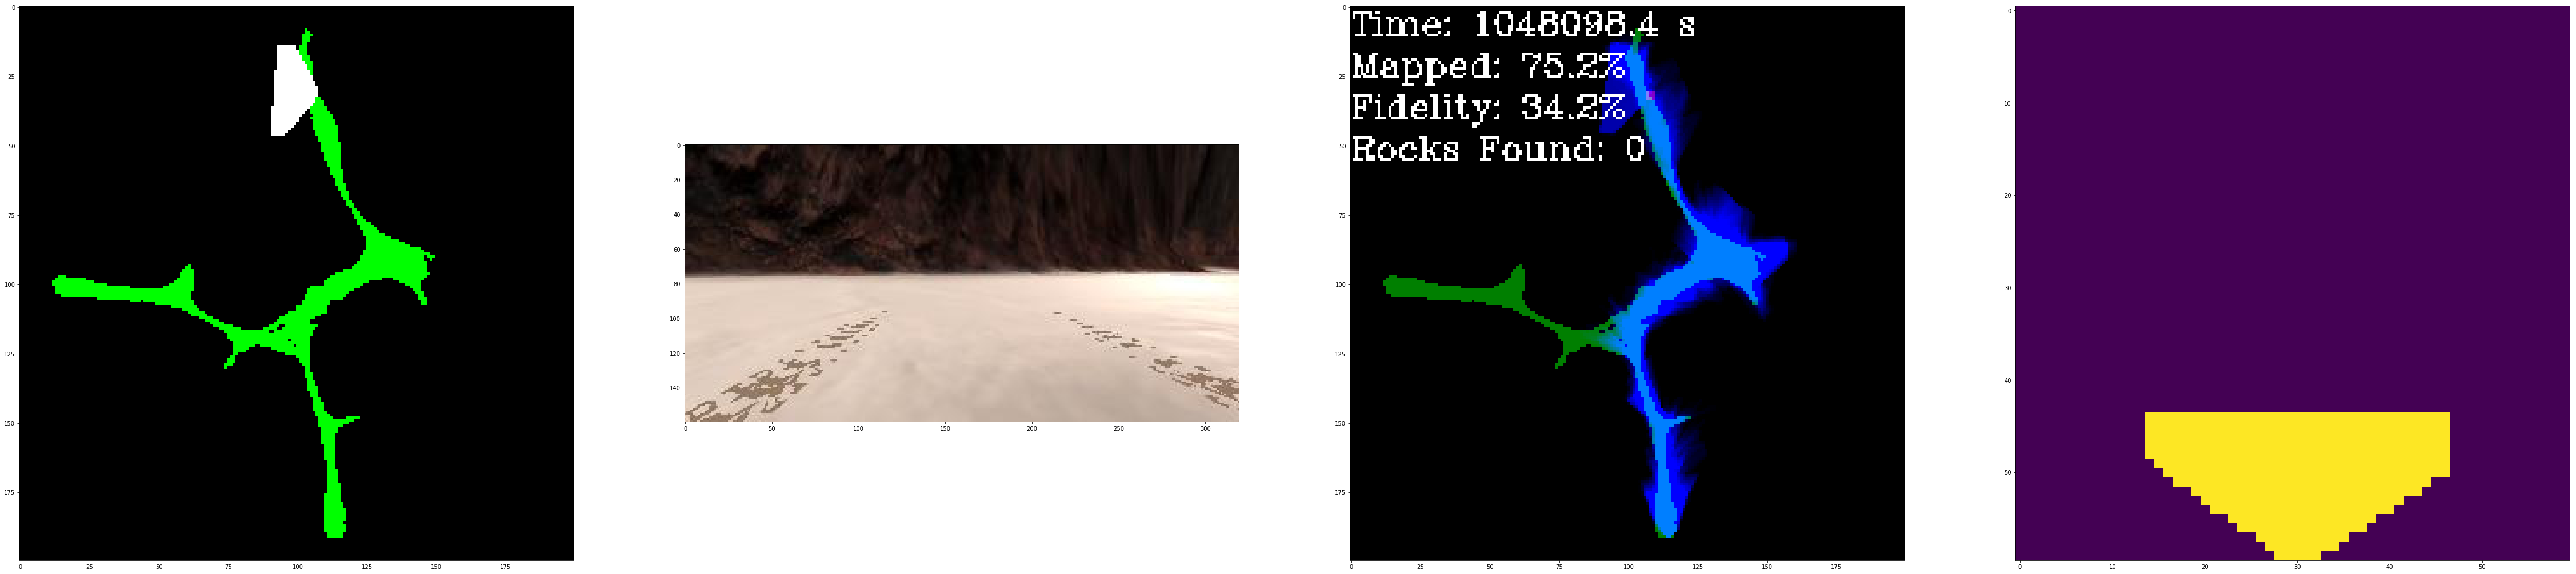

In [7]:
case = bad_cases[600]
analysis_case(case[1], case[0], render)

roll and pitch deviation: 0.00930786132812 0.167805999517
yaw = 171.119 , pitch =  0.167806 , roll =  359.991
rover position: 38.6687 96.9996
map gradient: fidelity = 0.5571428571428572 pos = 39 neg = 31


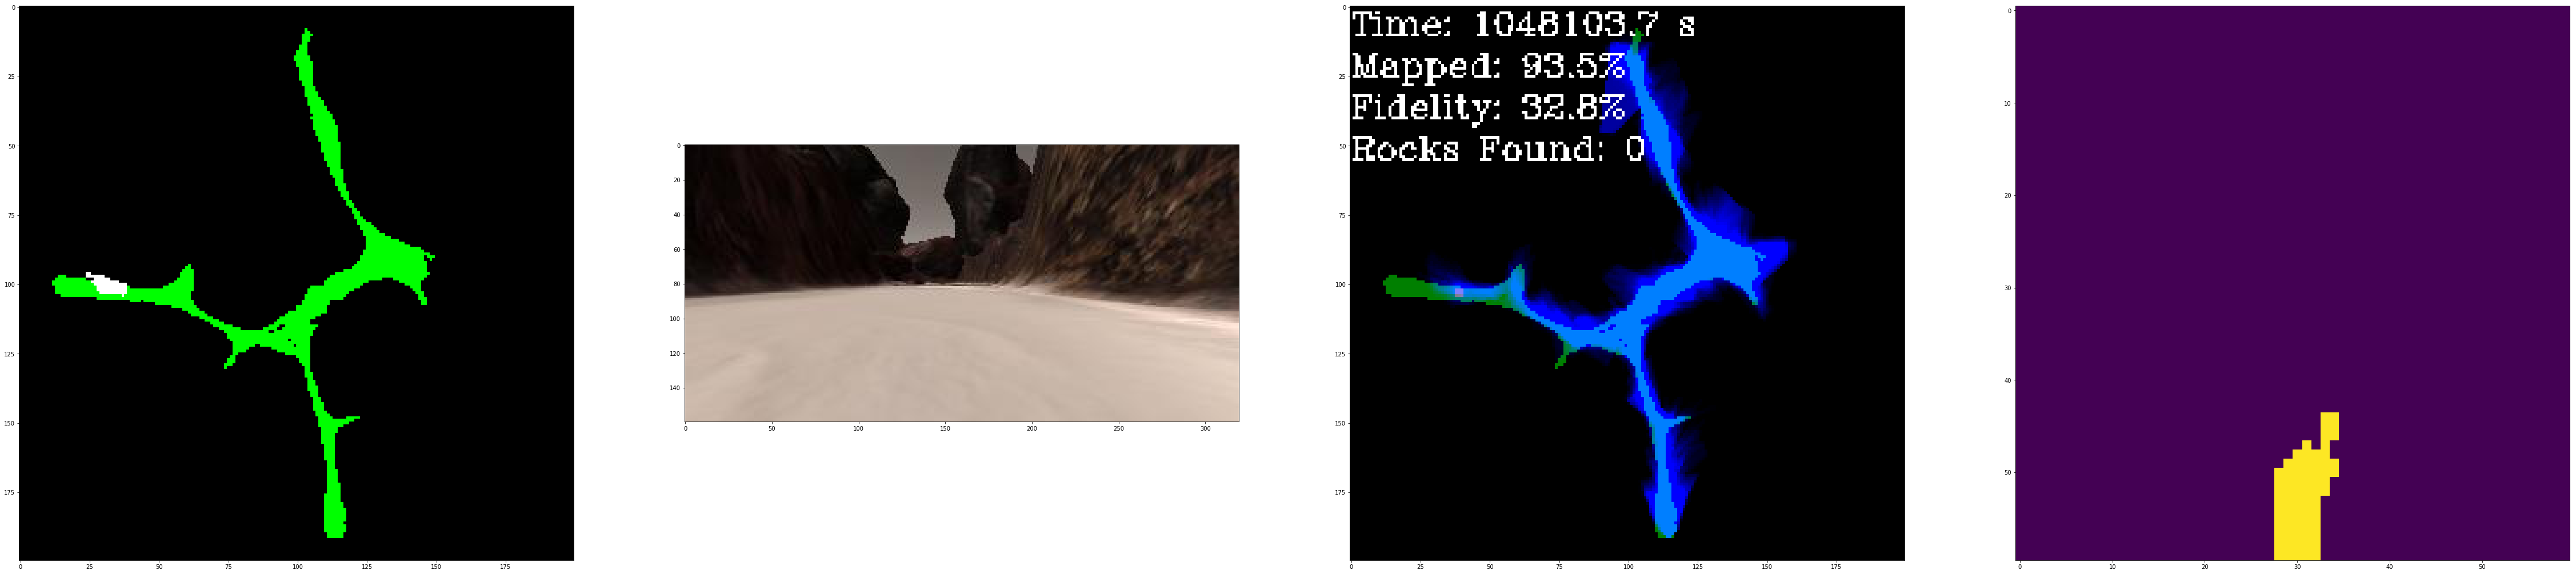

In [8]:
case = bad_cases[800]
analysis_case(case[1], case[0], render)

roll and pitch deviation: 0.0737915039062 1.16145694256
yaw = 256.297 , pitch =  1.16146 , roll =  359.926
rover position: 79.6589 79.2781
map gradient: fidelity = 0.5555555555555556 pos = 35 neg = 28


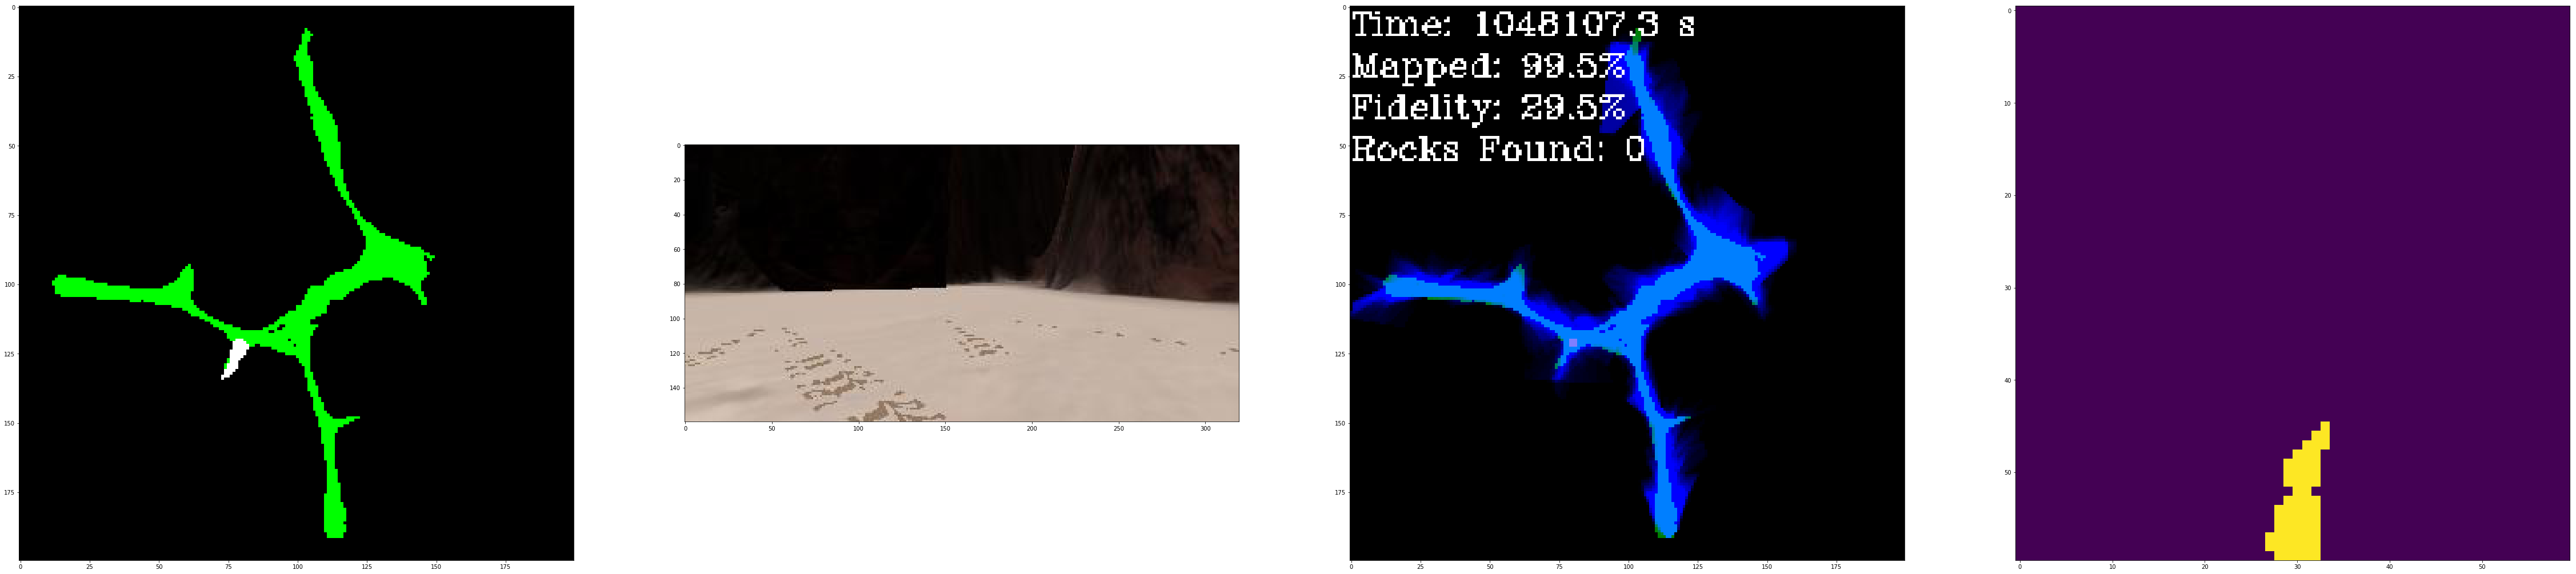

In [10]:
case = bad_cases[1000]
analysis_case(case[1], case[0], render)

roll and pitch deviation: 0.484919190407 0.721427083015
yaw = 136.473 , pitch =  0.721427 , roll =  0.484919
rover position: 125.221 121.313
map gradient: fidelity = 0.5142857142857142 pos = 36 neg = 34


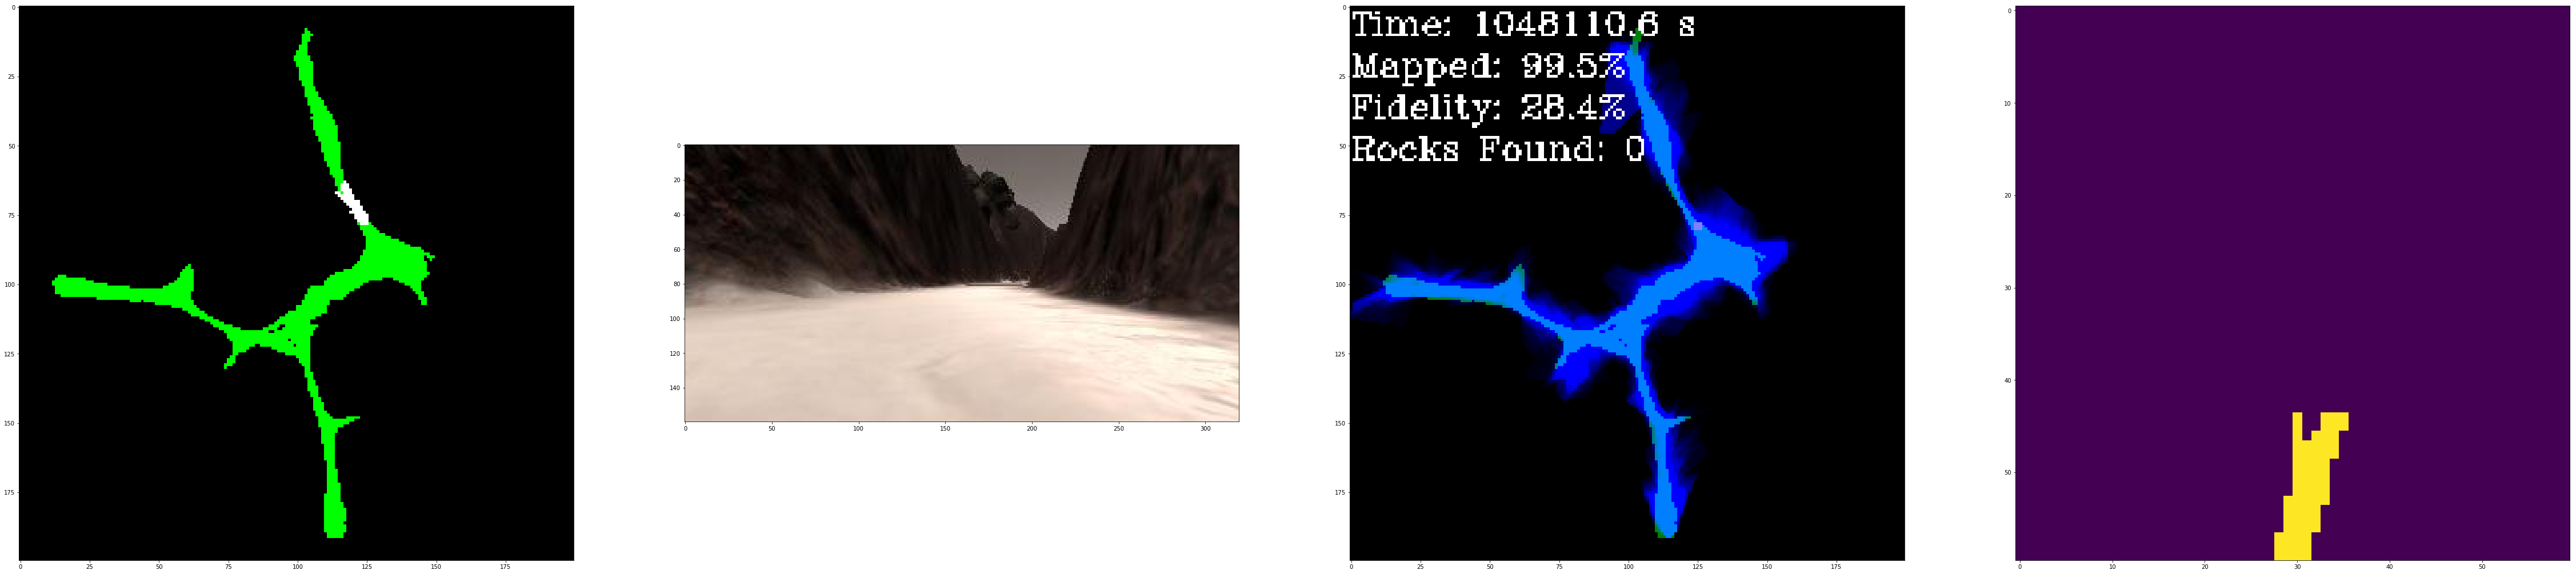

In [11]:
case = bad_cases[1200]
analysis_case(case[1], case[0], render)

roll and pitch deviation: 0.0838012695312 0.386662602425
yaw = 12.4293 , pitch =  0.386663 , roll =  359.916
rover position: 99.9345 181.659
map gradient: fidelity = 0.29906542056074764 pos = 32 neg = 75


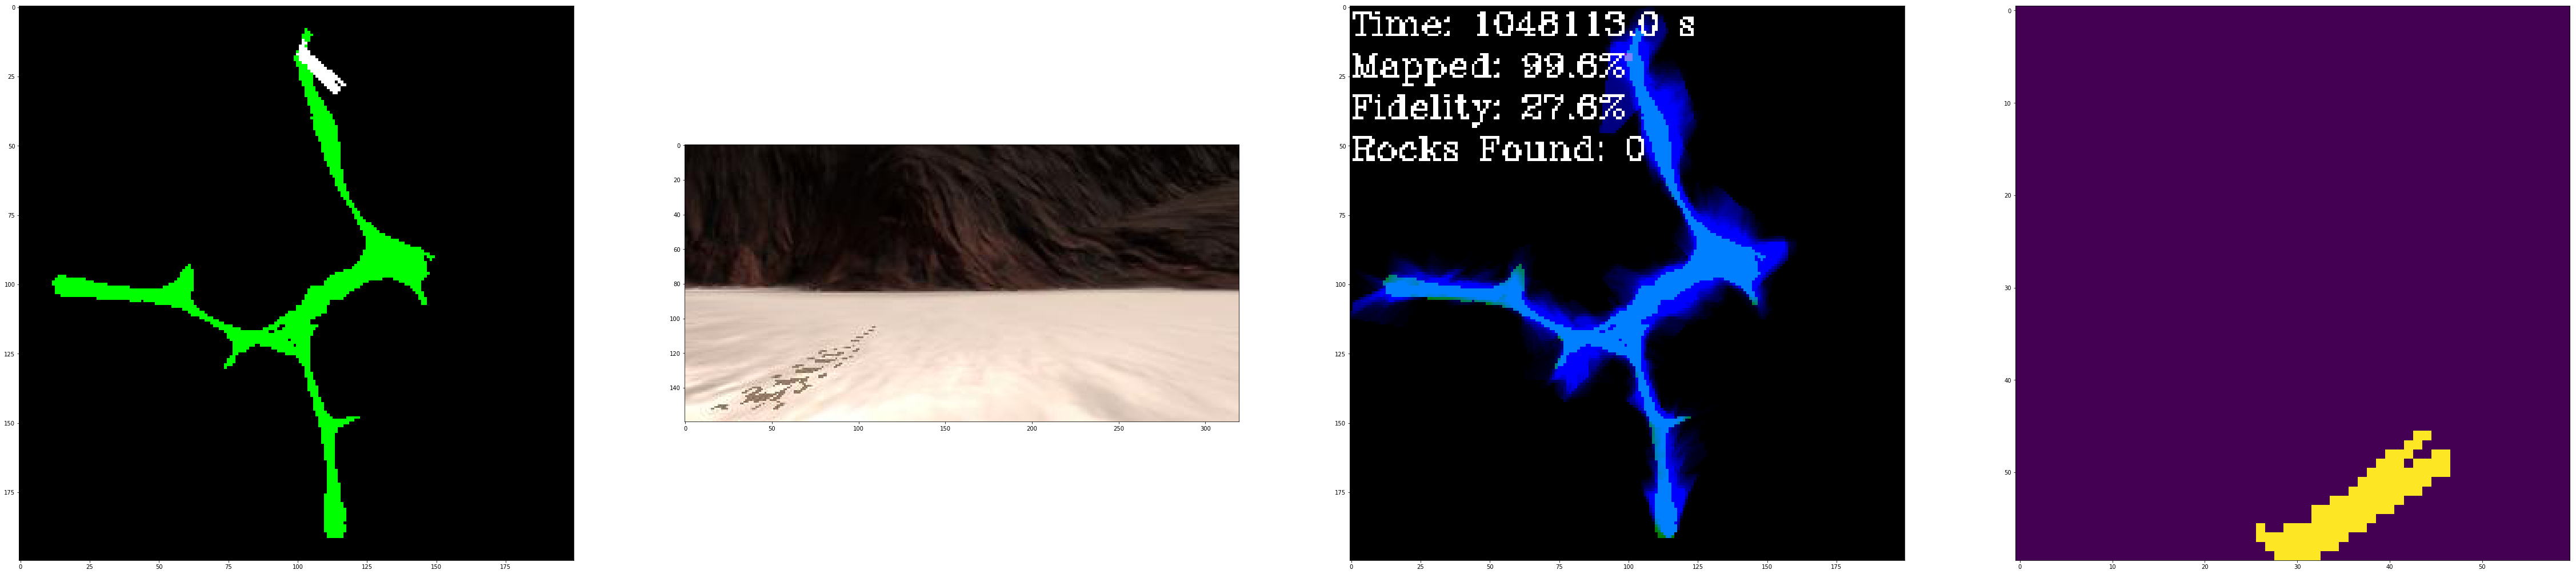

In [12]:
case = bad_cases[1400]
analysis_case(case[1], case[0], render)

roll and pitch deviation: 0.001923859003 1.46296000481
yaw = 198.05 , pitch =  1.46296 , roll =  0.00192386
rover position: 127.063 106.711
map gradient: fidelity = 0.463768115942029 pos = 128 neg = 148


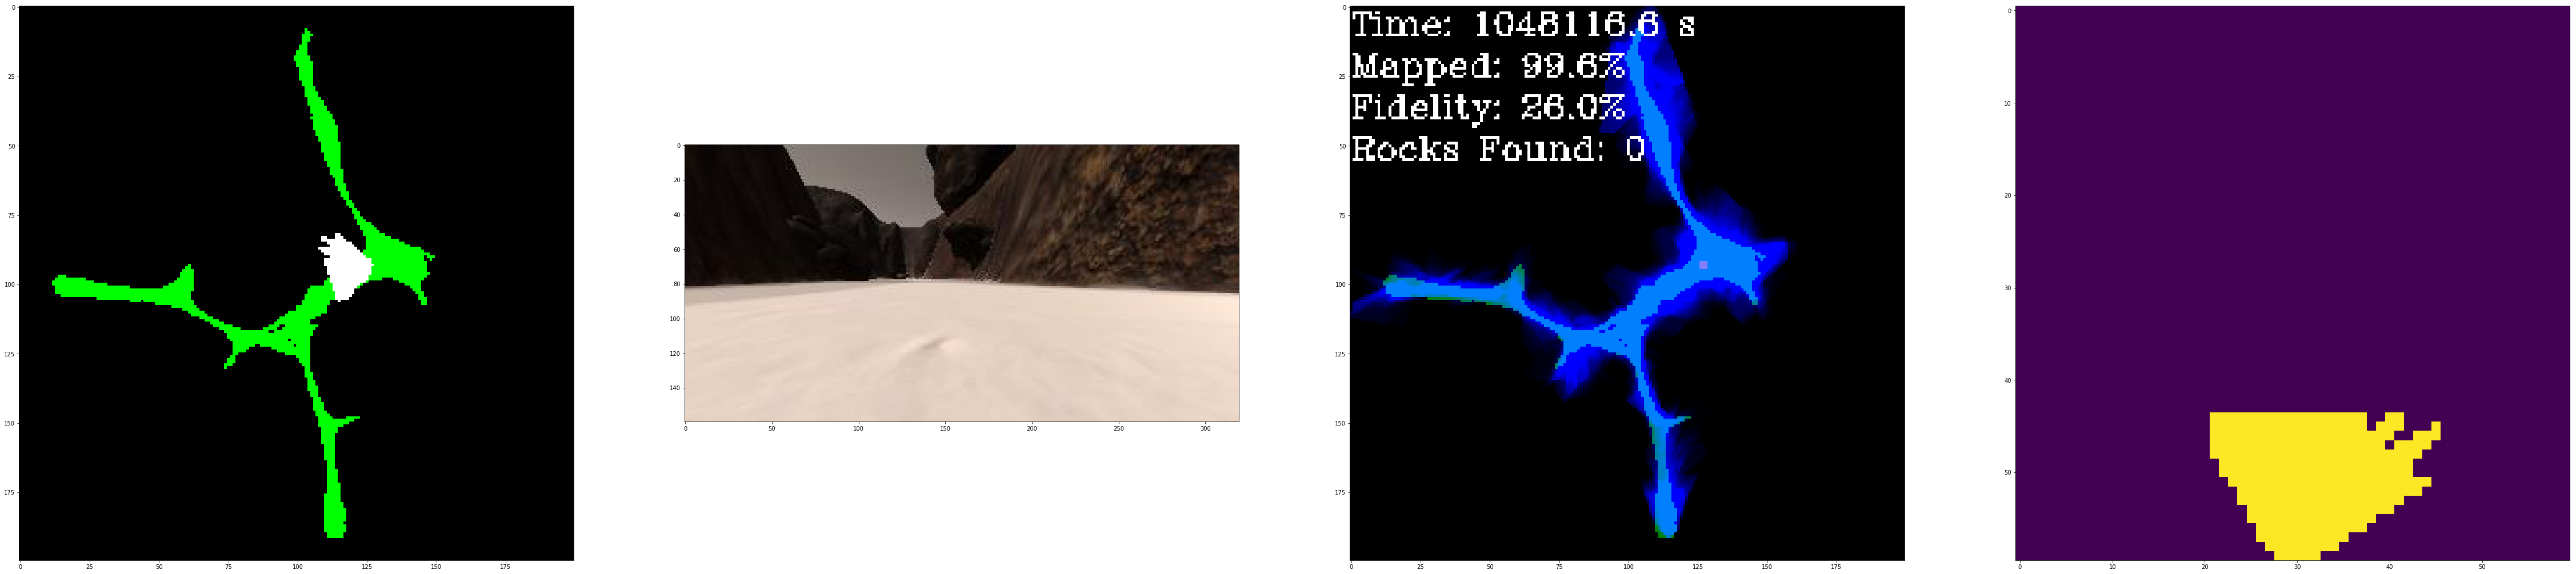

In [13]:
case = bad_cases[1600]
analysis_case(case[1], case[0], render)

roll and pitch deviation: 0.396514892578 0.844000220299
yaw = 272.286 , pitch =  0.844 , roll =  359.603
rover position: 111.961 50.0099
map gradient: fidelity = 0.3869047619047619 pos = 65 neg = 103


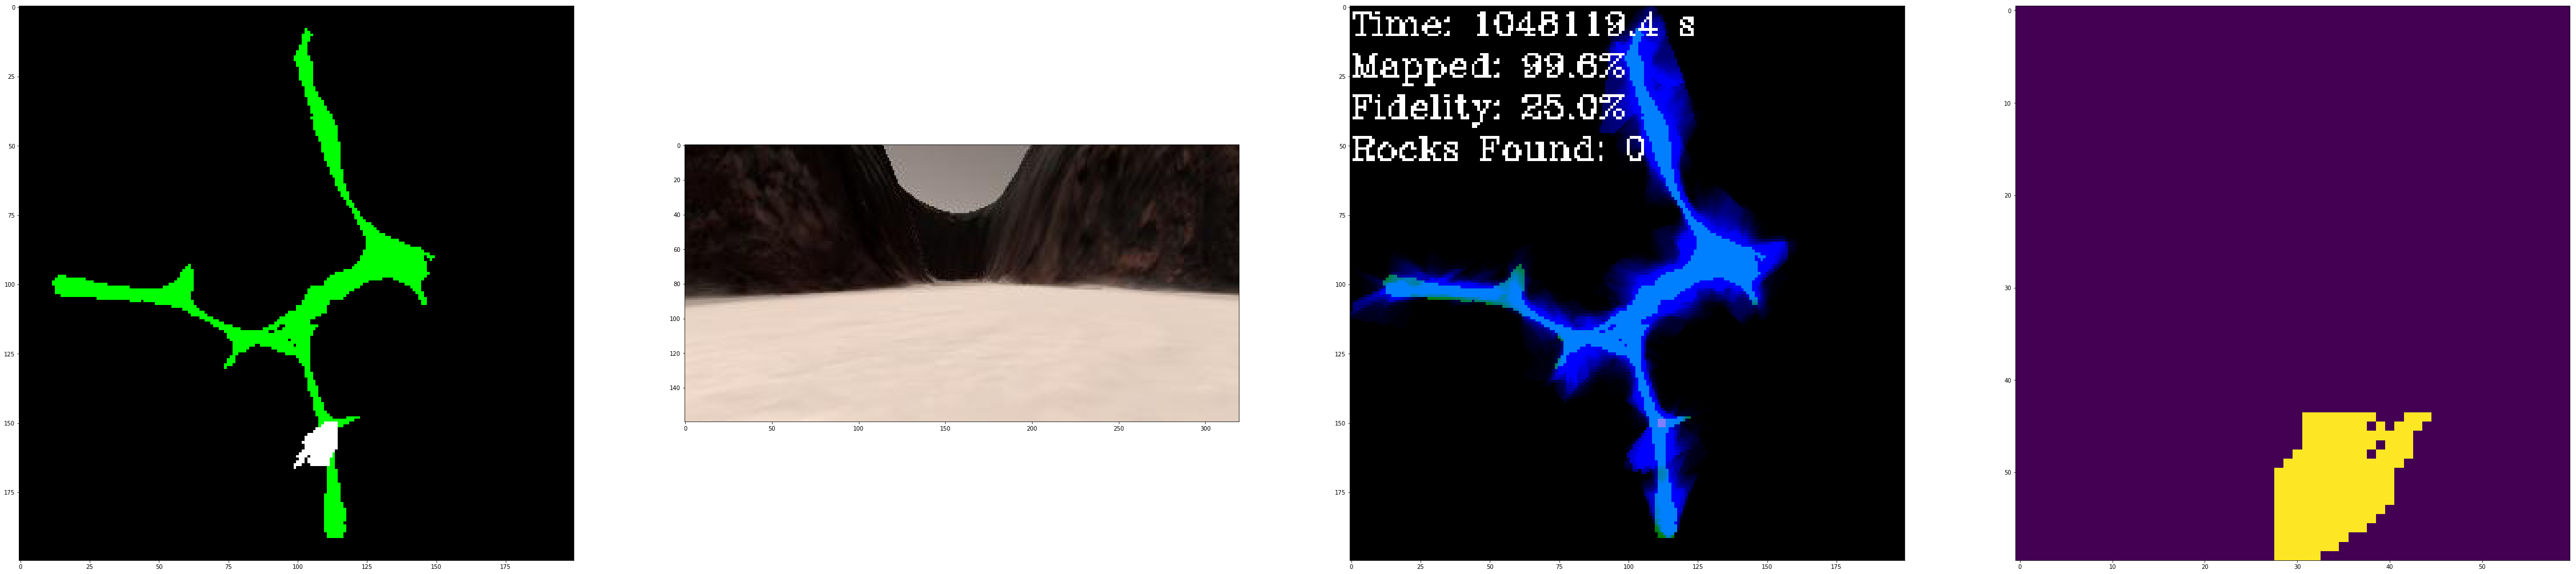

In [14]:
case = bad_cases[1800]
analysis_case(case[1], case[0], render)

the bad case analysis shows that the source of the low fidelity is the high pitch.
high pitches pushing the image horizon to near projection singularity results in overestimate of both y dimension (e.g. case 600) and x dimension